In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [24]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [30]:
df.isnull().sum()

age                       0
job                       0
marital                   0
education                 0
default                   0
housing                   0
loan                      0
contact                   0
month                     0
day_of_week               0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome                  0
Employment_Variation      0
Consumer_Price_Index      0
Consumer_Confirm_Index    0
Euriborem                 0
Number_Employed           0
y                         0
dtype: int64

In [28]:
df.shape

(41188, 21)

In [29]:
df.rename(columns={'emp.var.rate': 'Employment_Variation', 'nr.employed': 'Number_Employed', 'cons.price.idx': 'Consumer_Price_Index','euribor3m':'Euriborem','cons.conf.idx':'Consumer_Confirm_Index' }, inplace=True)

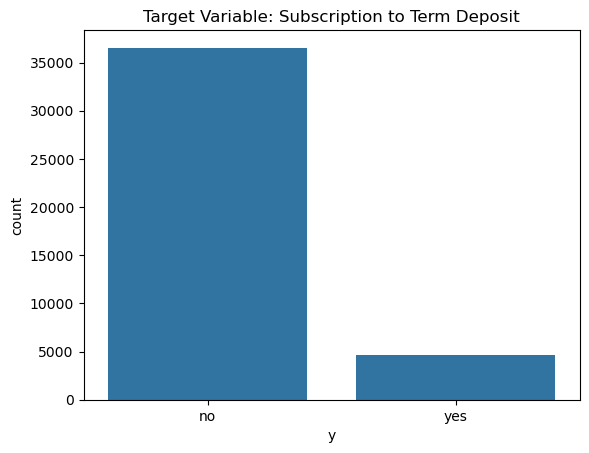

In [31]:
sns.countplot(data=df, x='y')
plt.title('Target Variable: Subscription to Term Deposit')
plt.show()

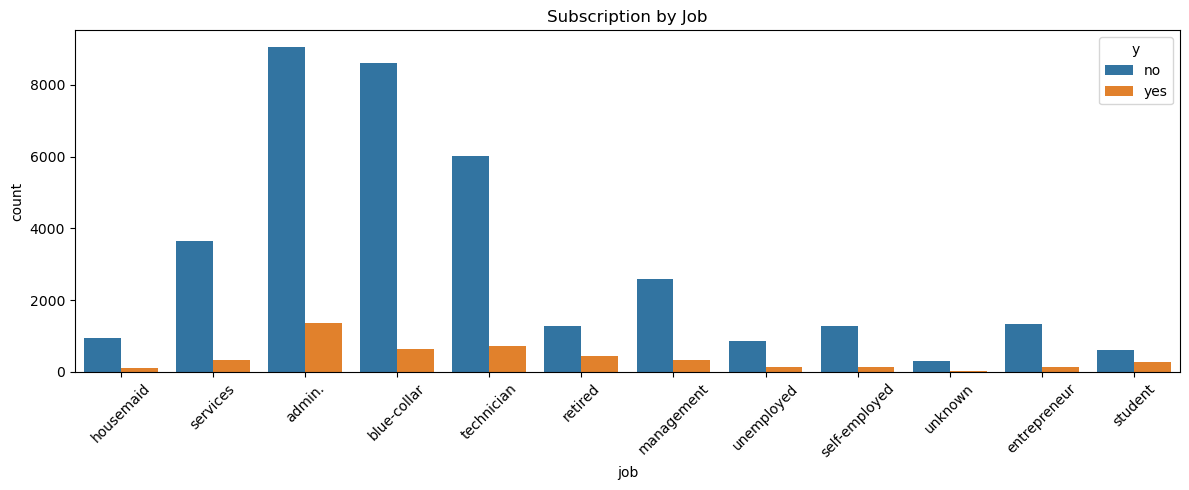

In [32]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title('Subscription by Job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

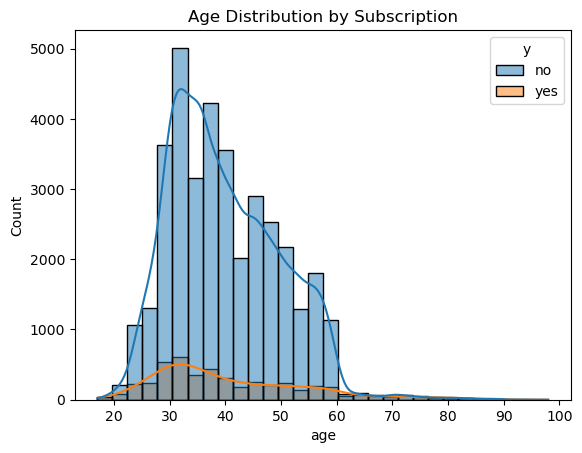

In [33]:
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True)
plt.title('Age Distribution by Subscription')
plt.show()

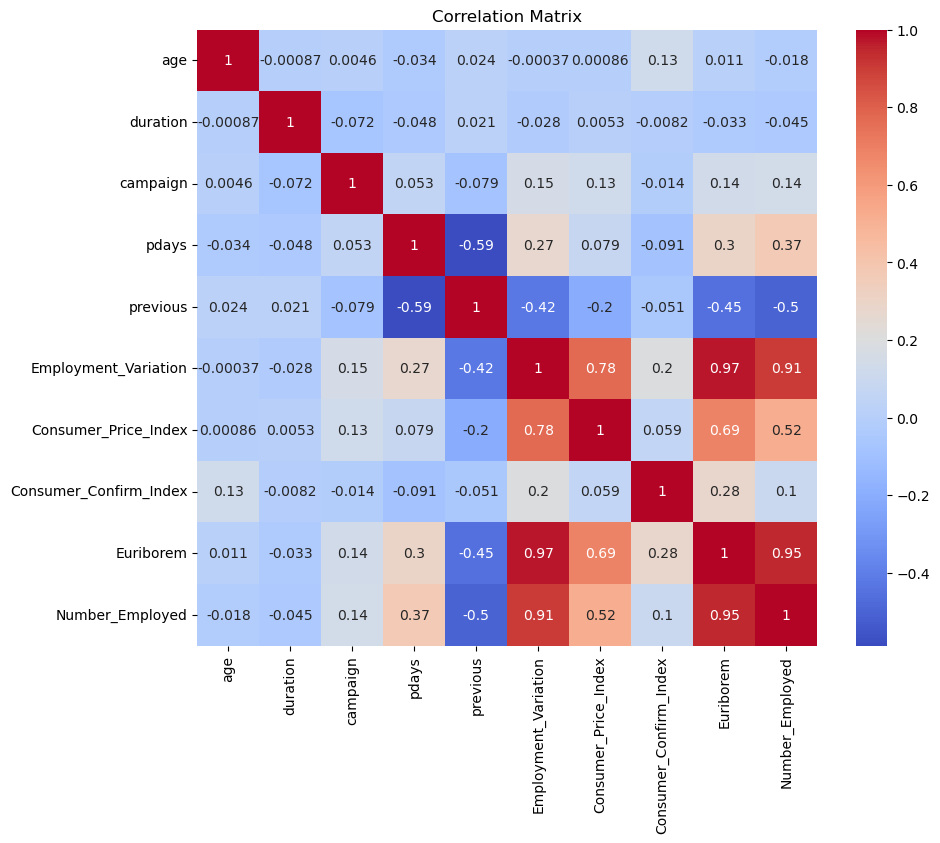

In [34]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [43]:
# Encoded the categorical variables using LabelEncoder

data=df.copy()
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le =label_encoders()
    data[column] = le.fit_transform(data[column])
    label_encoders [column]=le

TypeError: 'dict' object is not callable